# Машинное обучение, ФКН ВШЭ

# Практическое задание 6. Бустинговое

## Общая информация

Дата выдачи: 12.12.2023

Мягкий дедлайн: 24.12.2023 23:59 MSK

Жёсткий дедлайн: 24.12.2023 23:59 MSK

## Оценивание и штрафы

Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.

## Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-06-Username.ipynb

Username — ваша фамилия на латинице

## О задании

В этом задании вам предстоит вручную запрограммировать один из самых мощных алгоритмов машинного обучения — бустинг.

In [ ]:
from warnings import filterwarnings

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.sparse import load_npz
from sklearn.model_selection import train_test_split


sns.set(style='darkgrid')
filterwarnings('ignore')

In [ ]:
x = load_npz('x.npz')
y = np.load('y.npy')

Разделим на обучающую, валидационную и тестовую выборки (`random_state` оставьте равным 1337 для воспроизводимости).

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1337)

x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=1337)

x_train.shape, x_valid.shape, x_test.shape

((18825, 169), (2354, 169), (2353, 169))

## Задание 1. Реализация градиентного бустингового (4 балла)

Вам нужно дописать код в файлике `boosting.py`. Для вас уже подготовлен шаблон класса `Boosting`, вы можете менять его по своему усмотрению.

### Инструкции для функций:

#### `__init__`

В `__init__` приходит кучка параметров, распишем что есть что:

 - `base_model_class` - класс базовой модели нашего бустинга
 - `base_model_params` - словарь с гиперпараметрами для базовой модели
 - `n_estimators` - какое количество базовых моделей нужно обучить
 - `learning_rate` - темп обучения, должен быть из полуинтервала $(0, 1]$
 - `subsample` - доля объектов, на которой будет обучаться базовая модель (какую часть составляет бутстрапная выборка от исходной обучающей)
 - `early_stopping_rounds` - число итераций, после которых при отсутствии улучшения качества на валидационной выборке обучение останавливается
 - `plot` - строить ли после обучения всех базовых моделей график с качеством

#### `fit`

В `fit` приходит две выборки, обучающая и валидационная. На обучающей мы обучаем новые базовые модели, на валидационной считаем качество для ранней остановки (если это предусматривают параметры).

Сначала нам нужно сделать какую-то нулевую модель, сделать предсказания для обучающей и валидационной выборок (в шаблоне это нулевая модель, соответственно предсказания это просто `np.zeros`). После этого нужно обучить `n_estimators` базовых моделей (как и на что обучаются базовые модели смотрите в лекциях и семинарах). После каждой обученной базовой модели мы должны обновить текущие предсказания, посчитать ошибку на обучающей и валидационной выборках (используем `loss_fn` для этого), проверить на раннюю остановку.

После всего цикла обучения надо нарисовать график (если `plot`).


#### `fit_new_base_model`

В `fit_new_base_model` приходит обучающая выборка (целиком) и текущие предсказания для неё. Мы должны сгенерировать бутстрап выборку для обучения базовой модели и обучить базовую модель. После обучения модели запускаем поиск оптимальной гаммы, добавляем новую модель и гамму (не забываем про темп обучения) в соответствующие списки.

#### `predict_proba`

В `predict_proba` приходит выборка, нужно предсказать вероятности для неё. Суммируем предсказания базовых моделей на этой выборке (не забываем про гаммы) и накидываем сигмоиду.

In [ ]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
%autoreload 2

from boosting import Boosting

### Проверка кода

У автора задания всё учится около одной секунды.

In [ ]:
boosting = Boosting()

%time boosting.fit(x_train, y_train, x_valid, y_valid)

assert len(boosting.models) == boosting.n_estimators
assert len(boosting.gammas) == boosting.n_estimators

assert boosting.predict_proba(x_test).shape == (x_test.shape[0], 2)

print(f'Train ROC-AUC {boosting.score(x_train, y_train):.4f}')
print(f'Valid ROC-AUC {boosting.score(x_valid, y_valid):.4f}')
print(f'Test ROC-AUC {boosting.score(x_test, y_test):.4f}')

CPU times: user 1.39 s, sys: 4.49 ms, total: 1.39 s
Wall time: 1.4 s
Train ROC-AUC 0.9881
Valid ROC-AUC 0.9180
Test ROC-AUC 0.9205


## Задание 2. Обучение градиентного бустингового (1 балл)

Оцените качество на тестовой выборке вашей имплементации бустинга для различной максимальной глубины решающего дерева в качестве базовой модели. Здесь и далее мы будем использовать метрику ROC-AUC.

Перебирайте максимальную глубину от 1 до 30 с шагом 2 (остальные параметры бустинга стоит оставить равными по умолчанию). Постройте график зависимости качества на обучающей и тестовой выборке в зависимости от глубины.

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
results = {}

depths = range(1, 30, 2)

train_scores = []
test_scores = []

for depth in depths:
    model = Boosting(base_model_params={'max_depth': depth})
    model.fit(x_train, y_train, x_valid, y_valid)

    test_prediction = model.predict_proba(x_test)[:, 1]
    test_score = roc_auc_score(y_test, test_prediction)
    test_scores.append(test_score)

    train_prediction = model.predict_proba(x_train)[:, 1]
    train_score = roc_auc_score(y_train, train_prediction)
    train_scores.append(train_score)

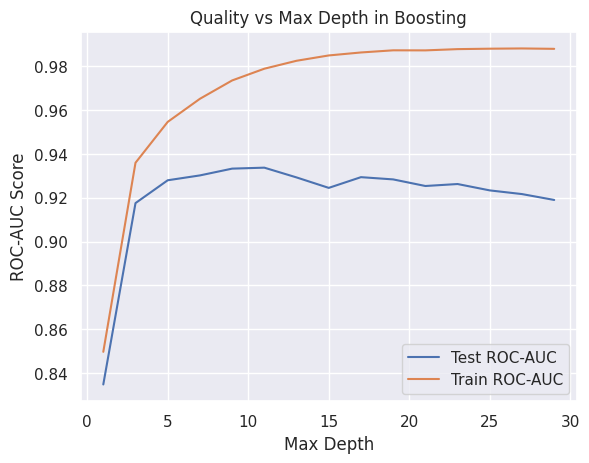

In [ ]:
plt.plot(depths, test_scores, label='Test ROC-AUC')
plt.plot(depths, train_scores, label='Train ROC-AUC')
plt.xlabel('Max Depth')
plt.ylabel('ROC-AUC Score')
plt.legend()
plt.title('Quality vs Max Depth in Boosting')
plt.show()

**Какая из моделей имеет лучшее качество? Как вы можете это объяснить?**

Увеличивая максимальную глубину, мы начинаем увеличивать максимальную глубину каждого базового алгоритма, в следствии чего мы увеличиваем разброс нашей модели и стремительно начинаем переобучаться!
Очевидно, что качество на обучающей лучше, чем на тесте (при условии роста глубины, наша подель все больше и больше начинает подстаиваться под данные), однако на тесте мы замечаем, что наилучшим по качеству является модель с глубиной равной примерно 8-13!Почему именно эта глубина объяснил в начале.



## Задание 3. Подбираем гиперпараметры и ищем лучшую модель (3 балла)

Подберите по валидационной выборке основные гиперпараметры для вашей модели бустинга. Следует подобрать все основные параметры для самого градиентного бустинга и для самих базовых моделей. Существуют библиотеки для подбора гиперпараметров, попробуйте использовать какую-нибудь из следующих двух - [Hyperopt](https://github.com/hyperopt/hyperopt), [Optuna](https://optuna.org/).

In [ ]:
!pip3 install hyperopt

In [ ]:
from hyperopt import fmin, tpe, hp

In [ ]:
def objective(params):
    max_depth = params['max_depth']
    min_samples_split = params['min_samples_split']
    min_samples_leaf = params['min_samples_leaf']
    learning_rate = params['learning_rate']
    n_estimators = params['n_estimators']
    subsample = params['subsample']
    # early_stopping_rounds = params['early_stopping_rounds']


    # Создайте и обучите модель с заданными параметрами
    model = Boosting(base_model_params={'max_depth': max_depth, 'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf}, learning_rate=learning_rate, n_estimators=n_estimators, subsample=subsample) #early_stopping_rounds=early_stopping_rounds)
    model.fit(x_train, y_train, x_valid, y_valid)

    # Получите предсказания и оцените качество на валидационной выборке
    valid_predictions = model.predict_proba(x_valid)[:, 1]
    # Минимизация, поэтому добавляем минус
    valid_score = -roc_auc_score(y_valid, valid_predictions)

    return valid_score

# Определим пространство поиска для гиперпараметров
space = {
    'max_depth': hp.choice('max_depth', range(1, 31, 2)),
    'min_samples_split': hp.choice('min_samples_split', range(2, 21)),
    'min_samples_leaf': hp.choice('min_samples_leaf', range(1, 21)),
    'learning_rate': hp.loguniform('learning_rate', -5, 0),
    'n_estimators': hp.choice('n_estimators', range(10, 100, 10)),
    'subsample': hp.uniform('subsample', 0.1, 1.0),
    # 'early_stopping_rounds': hp.choice('early_stopping_rounds', [None, 5, 10, 20]),
}

# Оптимизация гиперпараметров с использованием TPE (Tree-structured Parzen Estimator)
best = fmin(fn=objective, space=space, algo=tpe.suggest, max_evals=50, rstate=np.random.default_rng(1337))

print("Лучшие гиперпараметры:", best)


100%|██████████| 50/50 [15:02<00:00, 18.06s/trial, best loss: -0.9399716482563918]
Лучшие гиперпараметры: {'learning_rate': 0.28466621479694915, 'max_depth': 13, 'min_samples_leaf': 7, 'min_samples_split': 3, 'n_estimators': 7, 'subsample': 0.6071697918413378}


## Задание 4. Интерпретация бустингового (2 балл)

Постройте калибровочную кривую для вашей лучшей модели бустинга. Насколько хорошо бустинг оценивает вероятности? Постройте также калибровочную кривую для логистической регрессии, сравните их между собой. Проанализируйте полученные результаты.

In [ ]:
from sklearn.calibration import calibration_curve
from sklearn.linear_model import LogisticRegression

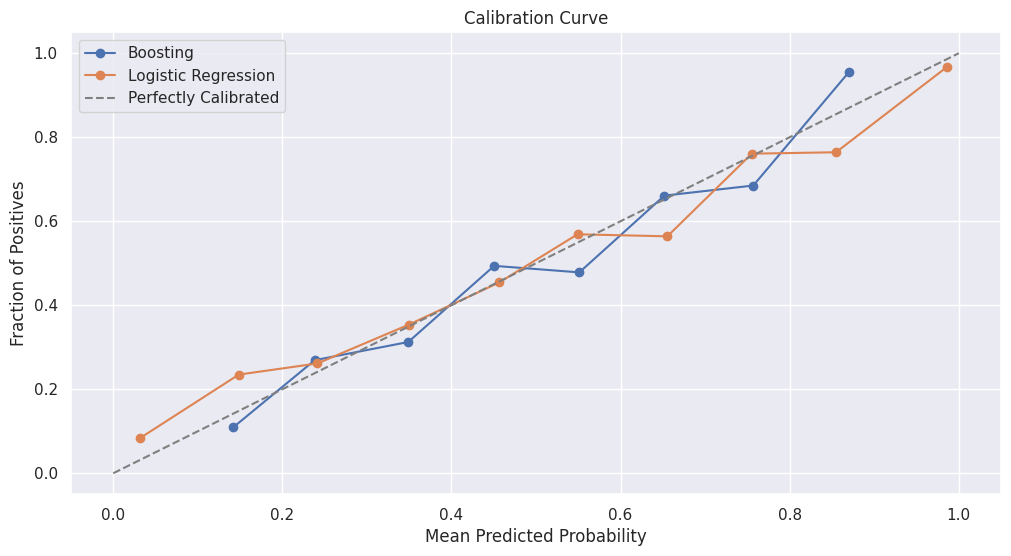

In [ ]:
# 1.Получим предсказанные вероятности лучшей модели бустинга
base_model_params = {'max_depth': best['max_depth'], 'min_samples_split': best['min_samples_split'], 'min_samples_leaf': best['min_samples_leaf']}
best_boosting_model = Boosting(base_model_params=base_model_params, n_estimators=best['n_estimators'], learning_rate=best['learning_rate'], subsample=best['subsample']) #early_stopping_rounds=best['early_stopping_rounds'])
best_boosting_model.fit(x_train, y_train, x_valid, y_valid)
boosting_probs = best_boosting_model.predict_proba(x_test)[:, 1]

# 2.Построим калибровочную кривую лучшей модели бустинга
prob_true_boosting, prob_pred_boosting = calibration_curve(y_test, boosting_probs, n_bins=10, strategy='uniform')

# 3.Получим предсказанные вероятности логистической регрессии
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_probs = logreg_model.predict_proba(x_test)[:, 1]

# 4.Построим калибровочную кривую логистической регрессии
prob_true_logreg, prob_pred_logreg = calibration_curve(y_test, logreg_probs, n_bins=10, strategy='uniform')

# 5.Сравним и нарисуем калибровочные кривые
plt.figure(figsize=(12, 6))
plt.plot(prob_pred_boosting, prob_true_boosting, marker='o', label='Boosting')
plt.plot(prob_pred_logreg, prob_true_logreg, marker='o', label='Logistic Regression')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()


Поведение достаточно схожее, и калибровочная кривая отвечающая за LogReg и за Boosting достоточно хорошо приближиены к диагональной кривой. Но по ощущением на выпадах, на моментах, когда кривая LogReg "сильно" отклоняется от диагонали, кривая Boosting в два раза меньше демонстрирует эти выподы. В этом плане затухания видны явно.

Теперь попробуем оценить важность признаков для бустинга.

Поскольку наша базовая модель - это дерево из `sklearn`, мы можем вычислить важность признака отдельно для каждого дерева и усреднить (воспользуйтесь `feature_importances_` у `DecisionTreeRegressor`), после этого нормировать значения, чтобы они суммировались в единицу (обратите внимание, что они должны быть неотрицательными - иначе вы что-то сделали не так).

Допишите в вашей реализации бустинга функцию `feature_importances_` чтобы она возвращала описанные выше важности признаков.

Нарисуйте столбчатую диаграмму важности признаков. На соседнем графике нарисуйте важность признаков для логистической регрессии, для этого используйте модули весов. Сравните графики. Проанализируйте полученные результаты.

In [ ]:
from boosting import Boosting

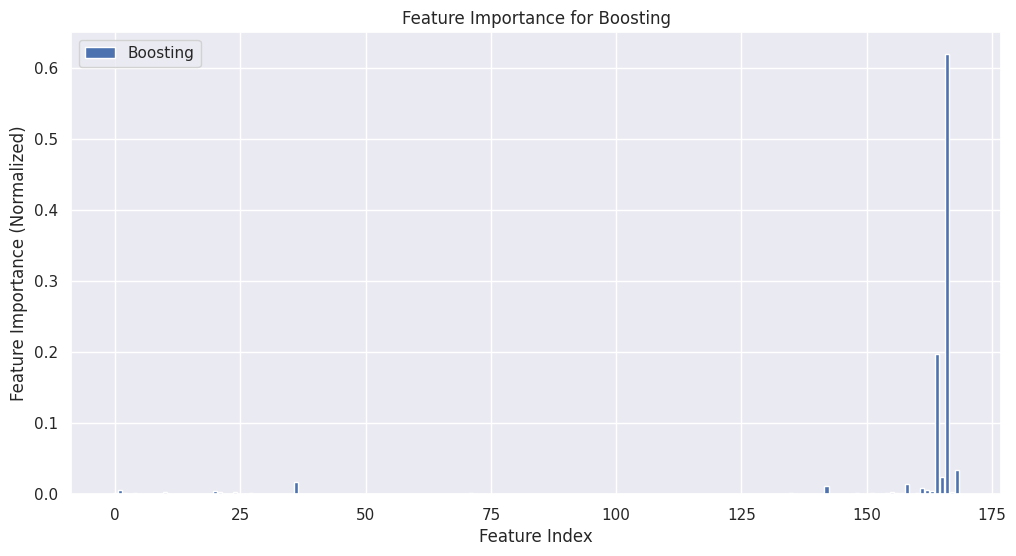

In [ ]:
# 1.Построим столбчатую диаграмму важности признаков бустинга
base_model_params = {'max_depth': best['max_depth'], 'min_samples_split': best['min_samples_split'], 'min_samples_leaf': best['min_samples_leaf']}
best_boosting_model = Boosting(base_model_params=base_model_params, n_estimators=best['n_estimators'], learning_rate=best['learning_rate'], subsample=best['subsample']) #early_stopping_rounds=best['early_stopping_rounds'])
best_boosting_model.fit(x_train, y_train, x_valid, y_valid)
boosting_feature_importances = best_boosting_model.feature_importances_()

plt.figure(figsize=(12, 6))
plt.bar(range(len(boosting_feature_importances)), boosting_feature_importances, label='Boosting')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance (Normalized)')
plt.title('Feature Importance for Boosting')
plt.legend()
plt.show()

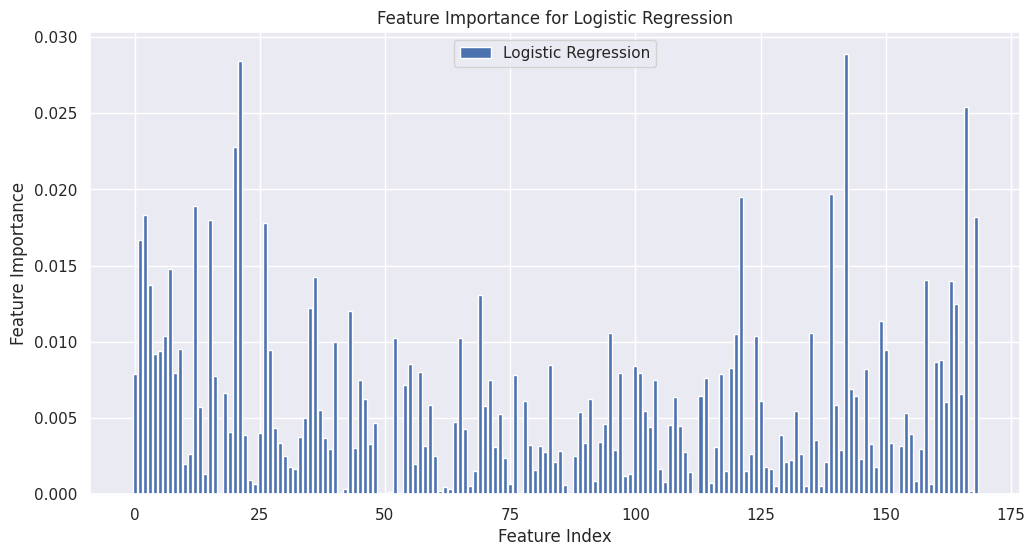

In [ ]:
# 2.Построим столбчатую диаграмму важности признако логистической регрессии
logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_feature_importances = np.abs(logreg_model.coef_[0])
logreg_feature_importances /= np.sum(logreg_feature_importances)

plt.figure(figsize=(12, 6))
plt.bar(range(len(logreg_feature_importances)), logreg_feature_importances, label='Logistic Regression')
plt.xlabel('Feature Index')
plt.ylabel('Feature Importance')
plt.title('Feature Importance for Logistic Regression')
plt.legend()
plt.show()

Легко заметить, что для градиентного бустинга лишь горстка признаков имеет реально значительный вес!

Кстати, чаще всего излишние признаки могут вредить качеству бустинга. Попробуйте отфильтровать на основании диаграммы хвост наименее важных признаков и снова обучить модель (с теми же гиперпараметрами). Стало ли лучше?

In [ ]:
# 1.Построим столбчатую диаграмму важности признаков бустинга
base_model_params = {'max_depth': best['max_depth'], 'min_samples_split': best['min_samples_split'], 'min_samples_leaf': best['min_samples_leaf']}
best_boosting_model = Boosting(base_model_params=base_model_params, n_estimators=best['n_estimators'], learning_rate=best['learning_rate'], subsample=best['subsample']) # early_stopping_rounds=best['early_stopping_rounds'])
best_boosting_model.fit(x_train, y_train, x_valid, y_valid)
boosting_feature_importances = best_boosting_model.feature_importances_()
original_model_score = best_boosting_model.score(x_valid, y_valid)

# 2.Определим порог важности признака, ниже которого они считаются "менее важными"
threshold = 0.001
important_feature_indices = np.where(boosting_feature_importances > threshold)[0]

x_train_filtered = x_train[:, important_feature_indices]
x_valid_filtered = x_valid[:, important_feature_indices]

# 3.Повторно обучим модель с отфильтрованными признаками
base_model_params = {'max_depth': best['max_depth'], 'min_samples_split': best['min_samples_split'], 'min_samples_leaf': best['min_samples_leaf']}
best_boosting_model_2 = Boosting(base_model_params=base_model_params, n_estimators=best['n_estimators'], learning_rate=best['learning_rate'], subsample=best['subsample'])
best_boosting_model_2.fit(x_train_filtered, y_train, x_valid_filtered, y_valid)
filtered_model_score = best_boosting_model_2.score(x_valid_filtered, y_valid)

print(f"Оценка качества на валидационной выборке до фильтрации: {original_model_score}")
print(f"Оценка качества на валидационной выборке после фильтрации: {filtered_model_score}")


Оценка качества на валидационной выборке до фильтрации: 0.9322683071087686
Оценка качества на валидационной выборке после фильтрации: 0.9326506405881709


**Подобрав норм порог, в принципе получилось добиться небольшого улучшения, но оно реально незначительное!**

## Задание 5 (бонус). Блендинговое (1 балл)

Реализуйте блендинг над вашей лучшей моделью и логистической регрессией. Улучшилось ли качество?

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

In [ ]:
base_model_params = {'max_depth': best['max_depth'], 'min_samples_split': best['min_samples_split'], 'min_samples_leaf': best['min_samples_leaf']}
best_boosting_model = Boosting(base_model_params=base_model_params, n_estimators=best['n_estimators'], learning_rate=best['learning_rate'], subsample=best['subsample']) #early_stopping_rounds=best['early_stopping_rounds'])
best_boosting_model.fit(x_train, y_train, x_valid, y_valid)
boosting_predictions = best_boosting_model.predict_proba(x_test)[:, 1]

logreg_model = LogisticRegression()
logreg_model.fit(x_train, y_train)
logreg_predictions = logreg_model.predict_proba(x_test)[:, 1]

# As far as I've understood, создадим взвешенную смесь предсказаний бустинга и логистической регрессии (вроде что-то такое)
blended_predictions = 0.7 * boosting_predictions + 0.3 * logreg_predictions

blended_score = roc_auc_score(y_test, blended_predictions)

print(f"ROC-AUC Score for Blending: {blended_score}")


ROC-AUC Score for Blending: 0.9384690052163125


**Да, на мое удивление, качество реально улудшилось, но тоже слегка!**





## Задание 6 (бонус). Катбустовое (1 балл)

Запустите [CatBoost](https://catboost.ai/en/docs/concepts/python-quickstart) на наших данных, сравните с вашей реализацией. Где получилось лучше?

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.6 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier
from sklearn.metrics import roc_auc_score

In [ ]:
catboost_model = CatBoostClassifier(iterations=100, depth=10, learning_rate=0.1, loss_function='Logloss')
catboost_model.fit(x_train, y_train, eval_set=(x_valid, y_valid), verbose=50)

catboost_predictions = catboost_model.predict_proba(x_valid)[:, 1]

catboost_score = roc_auc_score(y_valid, catboost_predictions)

print(f"ROC-AUC Score for CatBoost: {catboost_score}")

0:	learn: 0.5742854	test: 0.5808161	best: 0.5808161 (0)	total: 314ms	remaining: 31.1s
50:	learn: 0.1918739	test: 0.2917265	best: 0.2889067 (32)	total: 4.46s	remaining: 4.28s
99:	learn: 0.1686945	test: 0.2963551	best: 0.2889067 (32)	total: 6.93s	remaining: 0us

bestTest = 0.28890672
bestIteration = 32

Shrink model to first 33 iterations.
ROC-AUC Score for CatBoost: 0.9440081000420646


**За 32 шага модель катбуста, смогла получить совсем незначительное преимущество над моей моделью! Мне кажется он демонстрирует такие успехи из-за неочевидных оптимизаций под капотом, что может улучшить качество!**

## Социализационный бонус. Новогоднее 🎆 (0.5 балла)

Сфотографируйтесь с наряженной новогодней или рождественской ёлкой! Приложите фотографию, опишите свои впечатления, чего вы ждете от нового 2024 года?

Я даже елку еще не ставил, за окном +2, на дворе 24 декабря, новогоднее настроение даже мимо не проходило!\
От 2024 ждем первый лям баксов!
Фоток с наряженной елкой нет, к сожалению! Есть я, играющий в баскет!

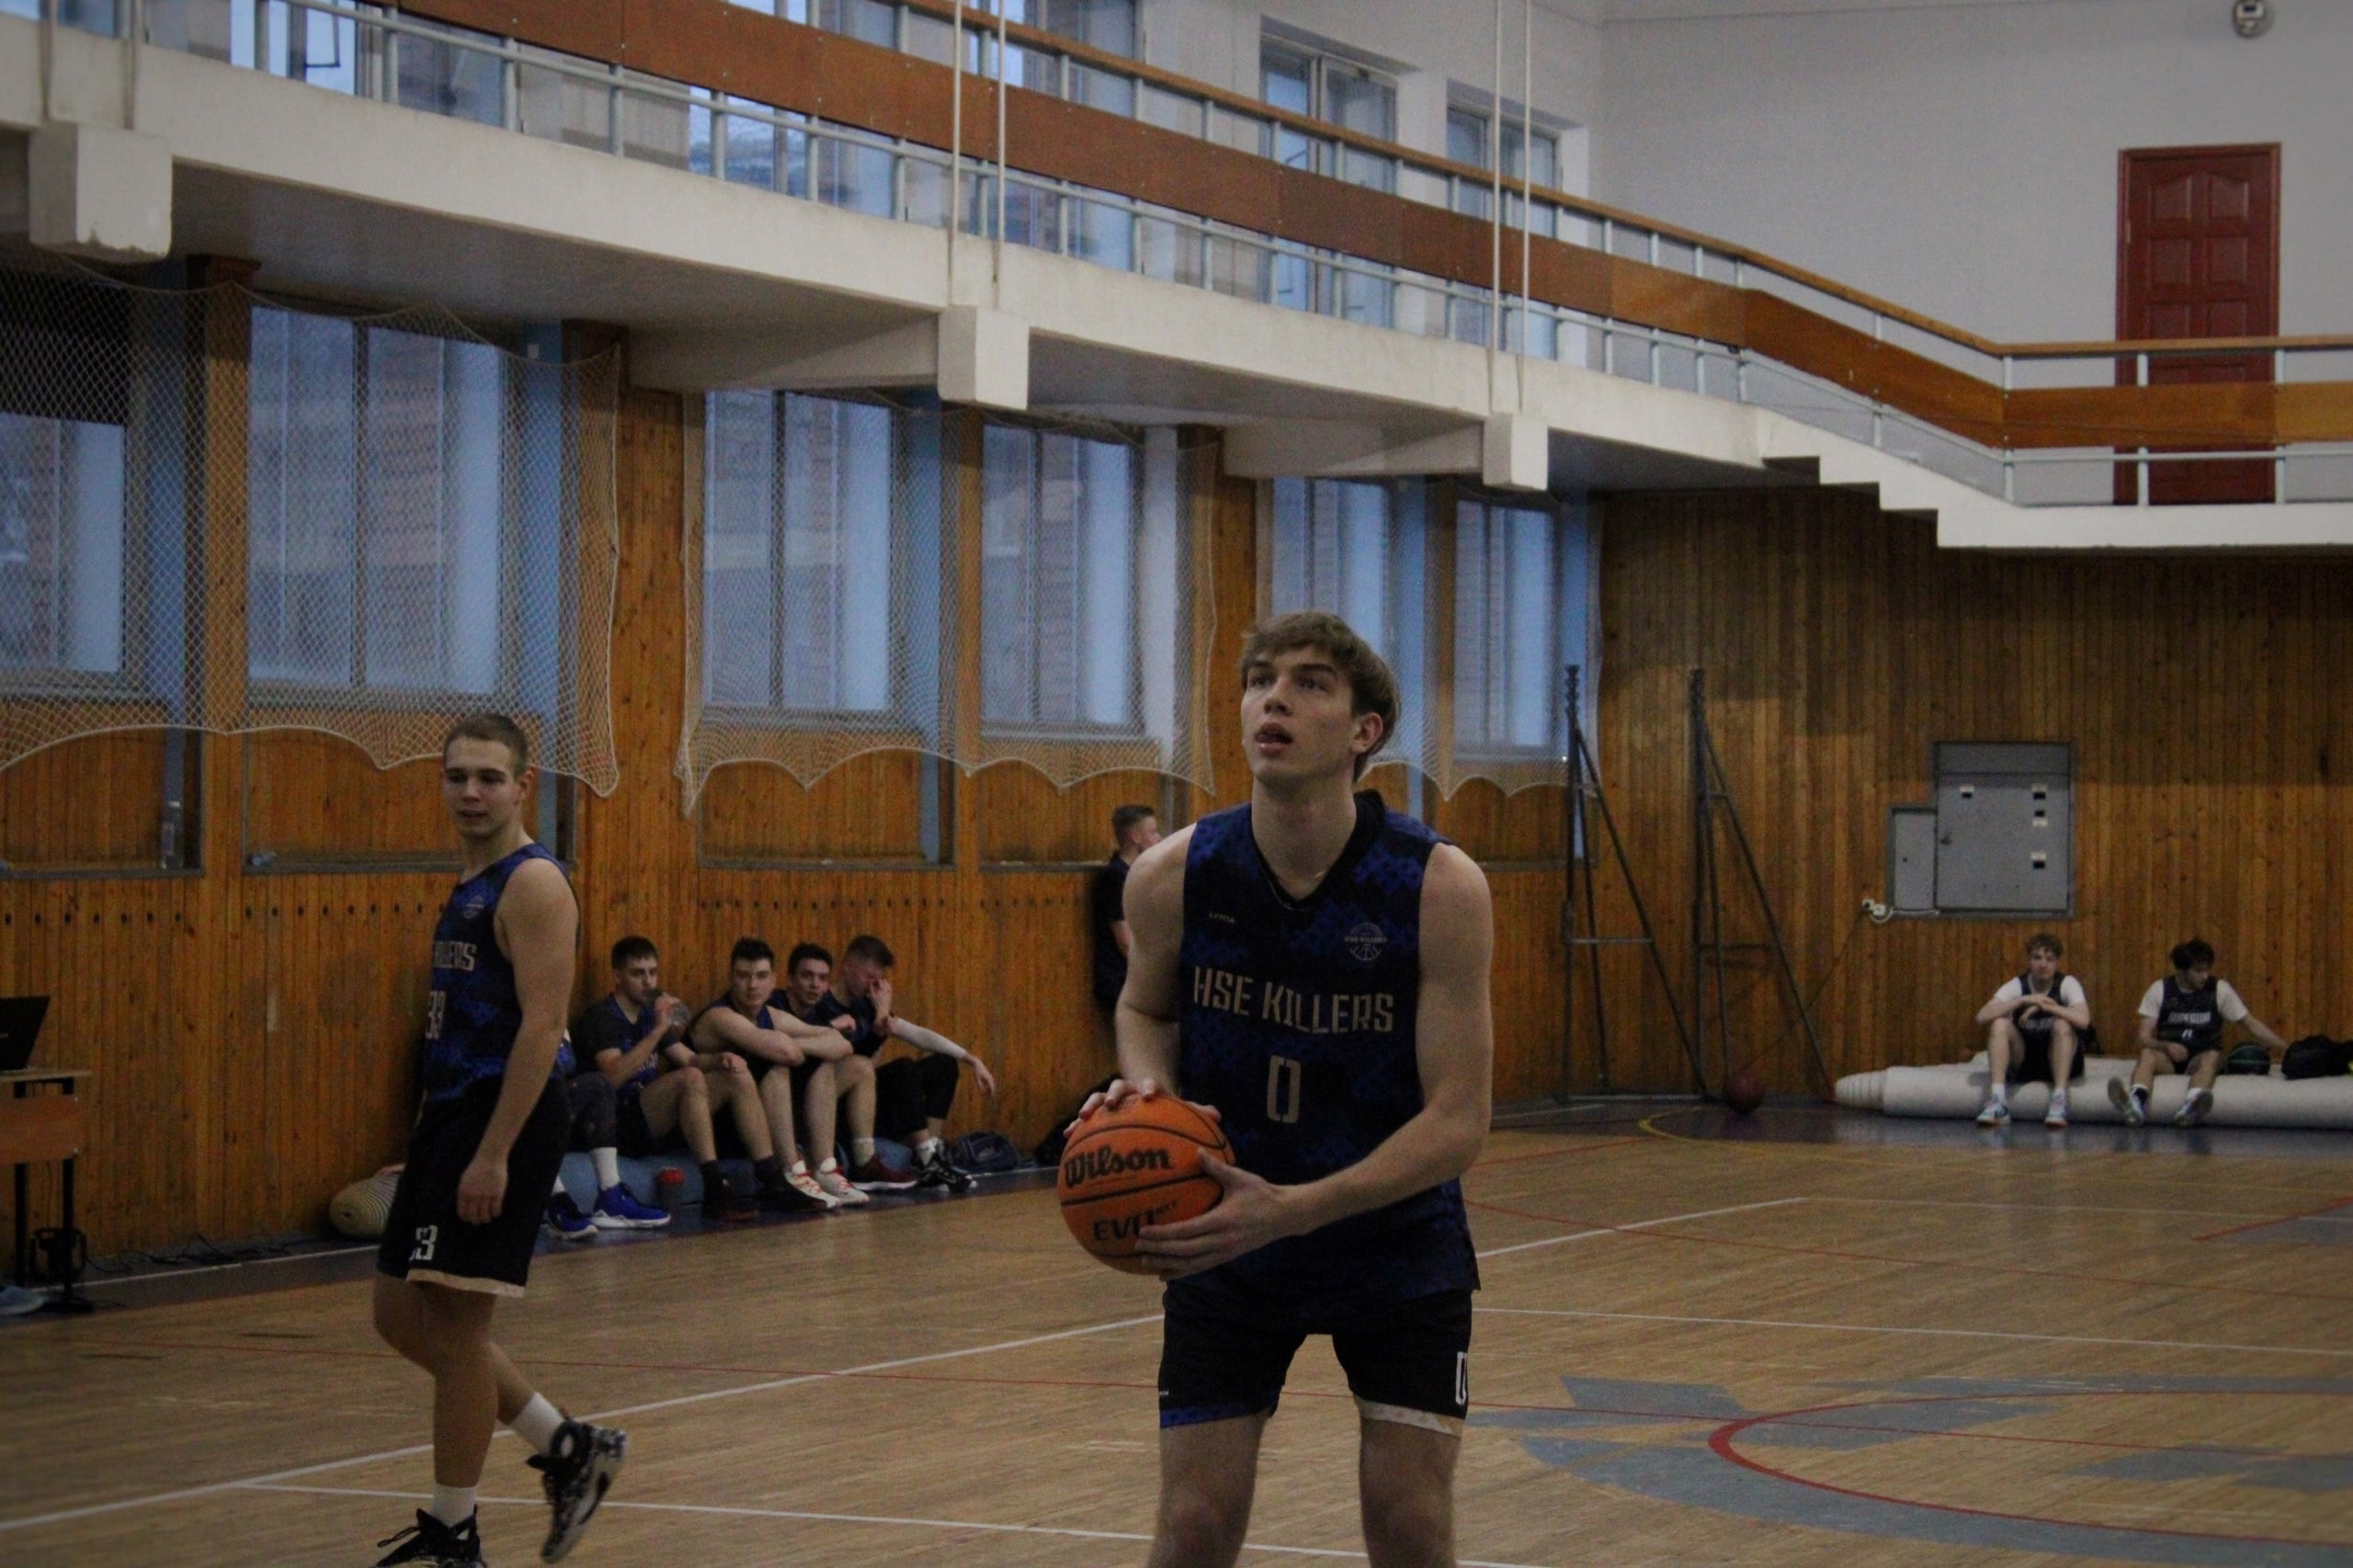.
